<a href="https://colab.research.google.com/github/agamduggal/Covid-19-Death-Medical-Analysis-Visualization-using-Plotly/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1: Importing Necessary Libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import plotly.io as pio
pio.renderers.default = 'colab'

Task2: Importing the dataset and Visualizing it

In [4]:
df=pd.read_csv("/covid_worldometer_data.csv")

In [5]:
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


In [6]:
px.bar(df.head(15), x="Country",y="TotalCases",color="Country")

In [7]:
px.bar(df.head(15), x="Country", y="TotalDeaths", color="Country")

In [8]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [9]:
px.scatter(df, x="Totalcases/1M", y="TotalDeath/1M", color="Country")
# you can filter countries and look at their individual statistics

Task 3: Geographic Visualization using Choropleth maps

A chloropeth map is a thematic map where different regions are highlighted in proportion to a statistical variable being represented.

In [10]:
px.choropleth(df,
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              projection="orthographic",
              color_continuous_scale="Viridis")

In [11]:
px.choropleth(df,
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              projection="equirectangular",
              color_continuous_scale="Plasma")

In [12]:
px.choropleth(df,
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              scope="asia",
              color_continuous_scale="Viridis")

In [13]:
df1 = pd.read_csv("/US_medical_data.csv")

In [14]:
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


Task 5: Visualizing the Pre-existing condition Medical dataset

In [15]:
filter1=df1[(df1["State"]=="US")]

In [16]:
px.bar(df1, x="Age Group", y="COVID-19 Deaths", color="Condition", hover_name="Condition", log_y=True)

In [17]:
px.bar(filter1, x="Age Group", y="COVID-19 Deaths", color="Condition Group", hover_name="Condition")

In [18]:
filter2= df1[(df1["State"]=="US") & (df1["Age Group"]=="All Ages")]

In [21]:
px.bar(filter2, x="Condition Group", y="COVID-19 Deaths", color="COVID-19 Deaths", hover_name="Condition")

In [23]:
filter3= df1[(df1["Condition"]=="Influenza and pneumonia") & (df1["Age Group"]=="All Ages")]

In [24]:
px.bar(filter3, x="State", y="COVID-19 Deaths", color="State", log_y=True)

Task 6: WordCloud Text Visualization

WordCloud 1- Condition group

- Step a= Convert the columns with conditions and condition group into list using tolist() function
- Step b= Convert the list to one single string
- Step c= Convert the string into WordCloud

In [25]:
list1 = filter2["Condition Group"].tolist()

In [26]:
string1 = "".join(list1)

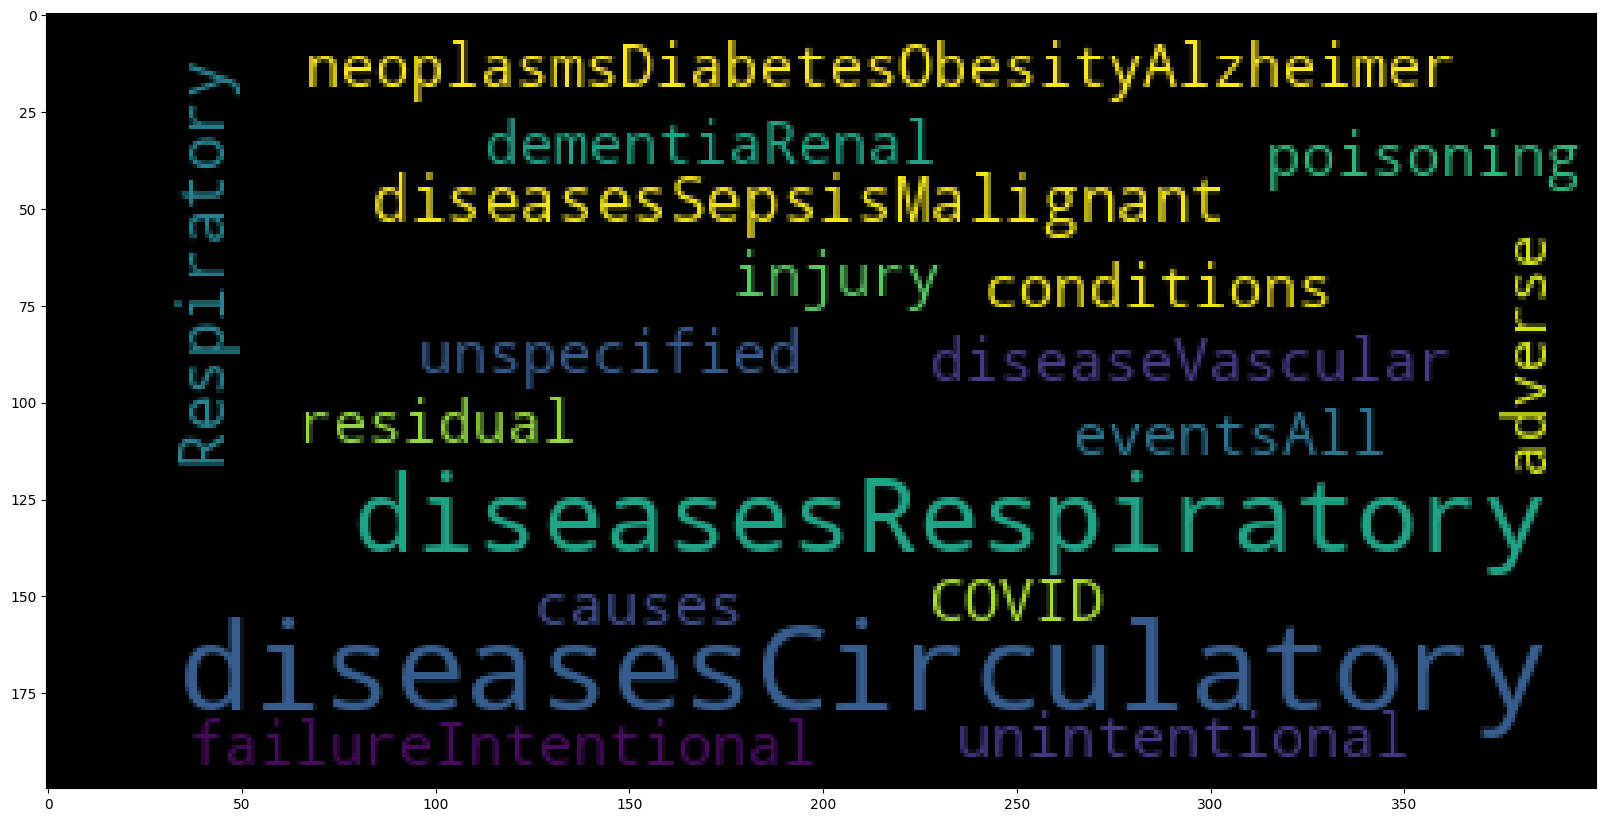

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))